## List the cities with the most reviews in descending order:

In [ ]:
SELECT 
    city,
    SUM(review_count) AS total_review_count
FROM business 
GROUP BY city
ORDER BY total_review_count DESC;

## Check if there are more reviews with the word "love" or with the word "hate".

Yes, the number of reviews with the word ”love” is 1780 while the number of reviews with the word “hate” is 232.

In [ ]:
-- For “hate” count

SELECT 
    COUNT(text) AS text_with_hate
FROM review
WHERE text LIKE "%hate%”;


-- For “love” count

SELECT
    COUNT(text) AS text_with_love
FROM review
WHERE text LIKE "%love%"

## Find the top 10 users with the most fans:

In [ ]:
SELECT
    name,
    fans
FROM user
ORDER BY fans DESC
LIMIT 10

## Inferences and Analysis

Pick one city and category of your choice and group the businesses in that city or category by their overall star rating. Compare the businesses with 2-3 stars to the businesses with 4-5 stars:

### Analyze if the two groups have different distribution of hours.

In Toronto, low-rating restaurants open before 11:00 am daily, while high-rating restaurants typically open after 11:00 am, often closing after 23:00. Higher-rated restaurants may not operate every day.

In [ ]:
SELECT
    b.name AS Restaurants_in_Toronto,
    CASE 
        WHEN b.stars BETWEEN 2 AND 3 THEN "Low-Rating"
        WHEN b.stars BETWEEN 4 AND 5 THEN "High-Rating"
    END AS star_rating,
    h.hours
FROM business b
JOIN category c
    ON b.id = c.business_id
JOIN hours h
    ON b.id = h.business_id
WHERE b.city = "Toronto" AND c.category = "Restaurants" AND star_rating = "High-Rating"
ORDER BY star_rating

Hours for High-Rating restaurants:
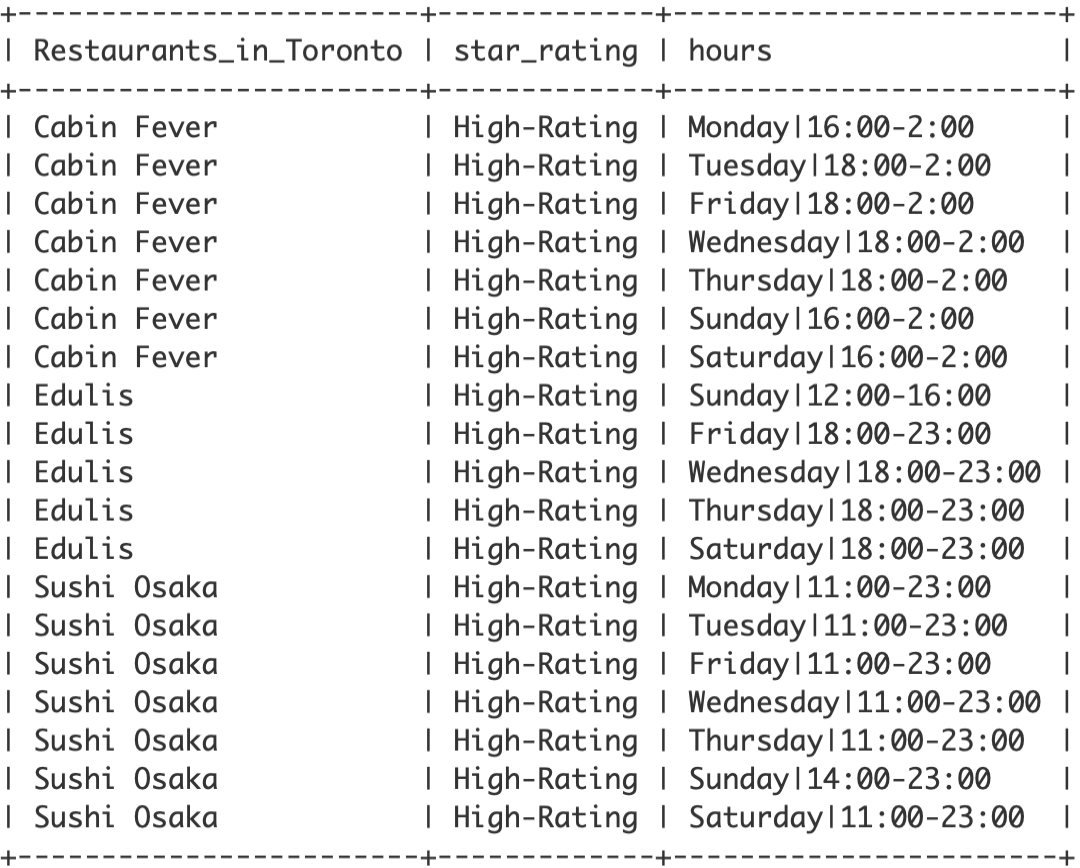

In [ ]:
SELECT
    b.name AS Restaurants_in_Toronto,
    CASE 
        WHEN b.stars BETWEEN 2 AND 3 THEN "Low-Rating"
        WHEN b.stars BETWEEN 4 AND 5 THEN "High-Rating"
    END AS star_rating,
    h.hours
FROM business b
JOIN category c
    ON b.id = c.business_id
JOIN hours h
    ON b.id = h.business_id
WHERE b.city = "Toronto" AND c.category = "Restaurants" AND star_rating = "Low-Rating"
ORDER BY star_rating


Hours for Low-Rating restaurants:
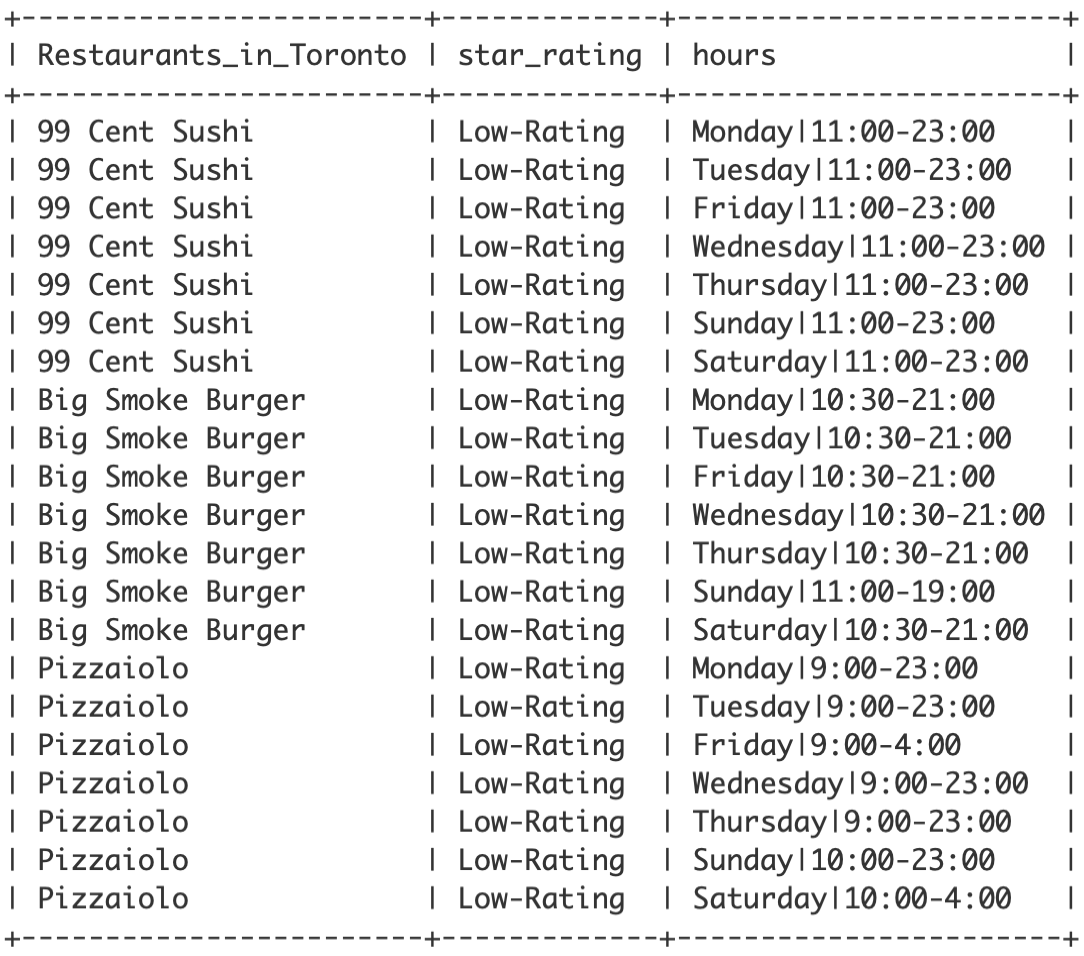

### Check if the two groups have a different number of reviews.

In Toronto, the number of reviews for 4-5 star restaurants is 8, 26 and 89, respectively, while the number of reviews for 2-3 star restaurants is 5, 34, 47.

In [ ]:
SELECT
    b.name AS Restaurants_in_Toronto,
    CASE 
        WHEN b.stars BETWEEN 2 AND 3 THEN "Low-Rating"
        WHEN b.stars BETWEEN 4 AND 5 THEN "High-Rating"
    END AS star_rating,
    b.review_count
FROM business b
JOIN category c
    ON b.id = c.business_id
WHERE b.city = "Toronto" AND c.category = "Restaurants" AND star_rating is NOT NULL
ORDER BY star_rating

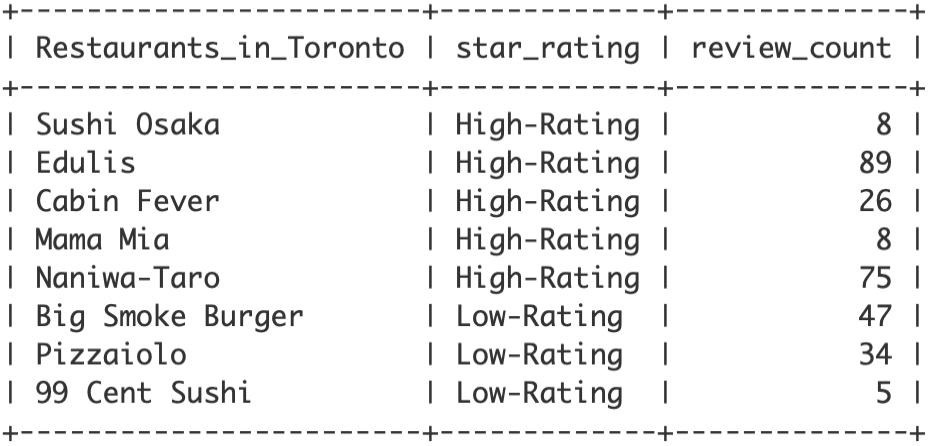

The average number of reviews for high-rating restaurants is 41.2, exceeding the average of 28.67 reviews for low-rating restaurants.

In [ ]:
SELECT
    CASE 
        WHEN b.stars BETWEEN 2 AND 3 THEN "Low-Rating"
        WHEN b.stars BETWEEN 4 AND 5 THEN "High-Rating"
    END AS star_rating,
    ROUND(AVG(review_count),2) AS avg_reviews
FROM business b
JOIN category c
    ON b.id = c.business_id
WHERE b.city = "Toronto" AND c.category = "Restaurants" AND star_rating is NOT NULL
GROUP BY star_rating
ORDER BY star_rating

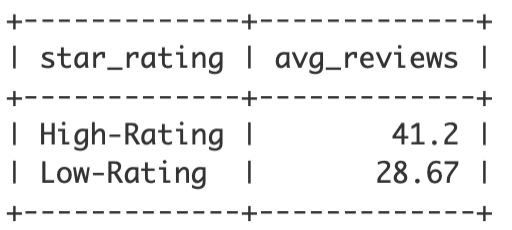

### Infer anything from the location data provided between these two groups?

In Toronto, the restaurant in the neighborhood of Niagara has the highest number of reviews, which may benefit from Niagara's status as the most popular tourist attraction in the area. However, we have too limited information on restaurants to conclude anything about the neighborhood as a factor for a Toronto restaurant to be high-rated or low-rated.

In [ ]:
SELECT
    b.name AS Restaurants_in_Toronto,
    b.neighborhood,
    CASE 
        WHEN b.stars BETWEEN 2 AND 3 THEN "Low-Rating"
        WHEN b.stars BETWEEN 4 AND 5 THEN "High-Rating"
    END AS star_rating,
    b.review_count
FROM business b
JOIN category c
    ON b.id = c.business_id
WHERE b.city = "Toronto" AND c.category = "Restaurants" AND star_rating is NOT NULL
GROUP BY b.neighborhood
ORDER BY star_rating

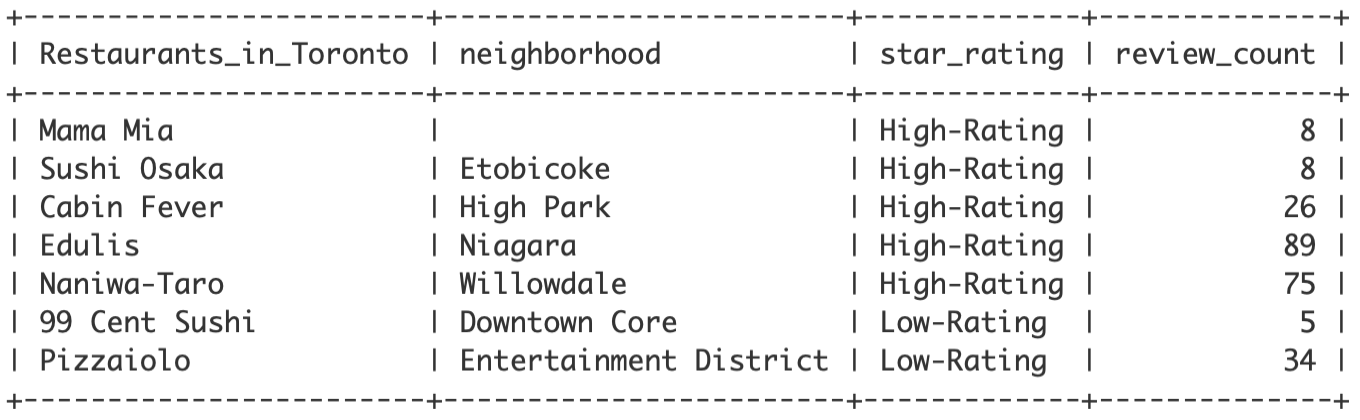

### Find differences between the businesses that are still open and the businesses that are closed.

There are more open businesses (8480) than closed ones (1520). Open businesses have received more reviews, averaging 32 reviews, compared to the average of 23 reviews received by closed businesses.

In [ ]:
-- The closed businesses

SELECT
    COUNT(*) AS number_of_closed_businesses,
    ROUND(AVG(stars),2) AS avg_stars,
    ROUND(AVG(review_count),0) AS avg_review_count,
    is_open
FROM business
WHERE is_open = 0

-- The open businesses

SELECT
    COUNT(*) AS number_of_open_businesses,
    ROUND(AVG(stars),2) AS avg_stars,
    ROUND(AVG(review_count),0) AS avg_review_count,
    is_open
FROM business
WHERE is_open = 1

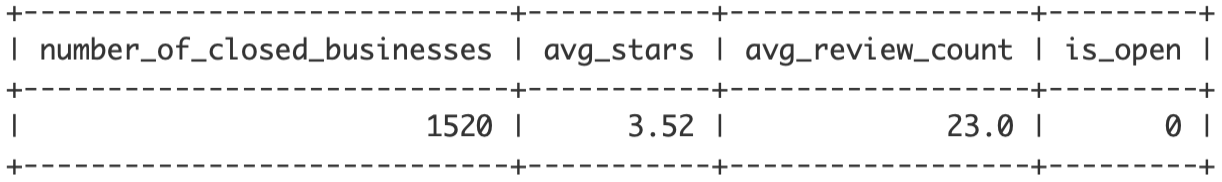
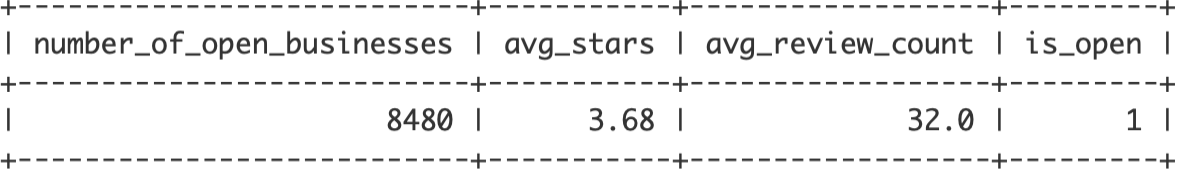

### Predicting the overall star rating for a business

To predict the overall rating, considering the lack of specific information about the quality of service, we can explore the following approaches:

Review Count:

- Utilize the review_count column, assuming that businesses with better service quality tend to accumulate more reviews.

Sentiment Analysis:

- Leverage the text column from the review table to perform sentiment analysis.
- Test whether the presence of sentiment-laden words like "hate" and "love" can act as predictors of overall rating.

Validation with Stars Column:

- Validate and refine hypotheses using the stars column from the business table.
- Verify whether the assumptions about review count and sentiment align with the actual star ratings.


In [ ]:
SELECT 
    b.name,
    b.review_count,
    CASE
        WHEN r.text LIKE "%love%" THEN "positive"
        WHEN r.text LIKE "%hate%" THEN "negative"
    END AS sentiment,
    b.stars
FROM business b
JOIN review r 
    ON b.id = r.business_id
    
-- Reviews without the words "hate" and "love" are ignored

WHERE  sentiment IS NOT NULL
ORDER BY b.name


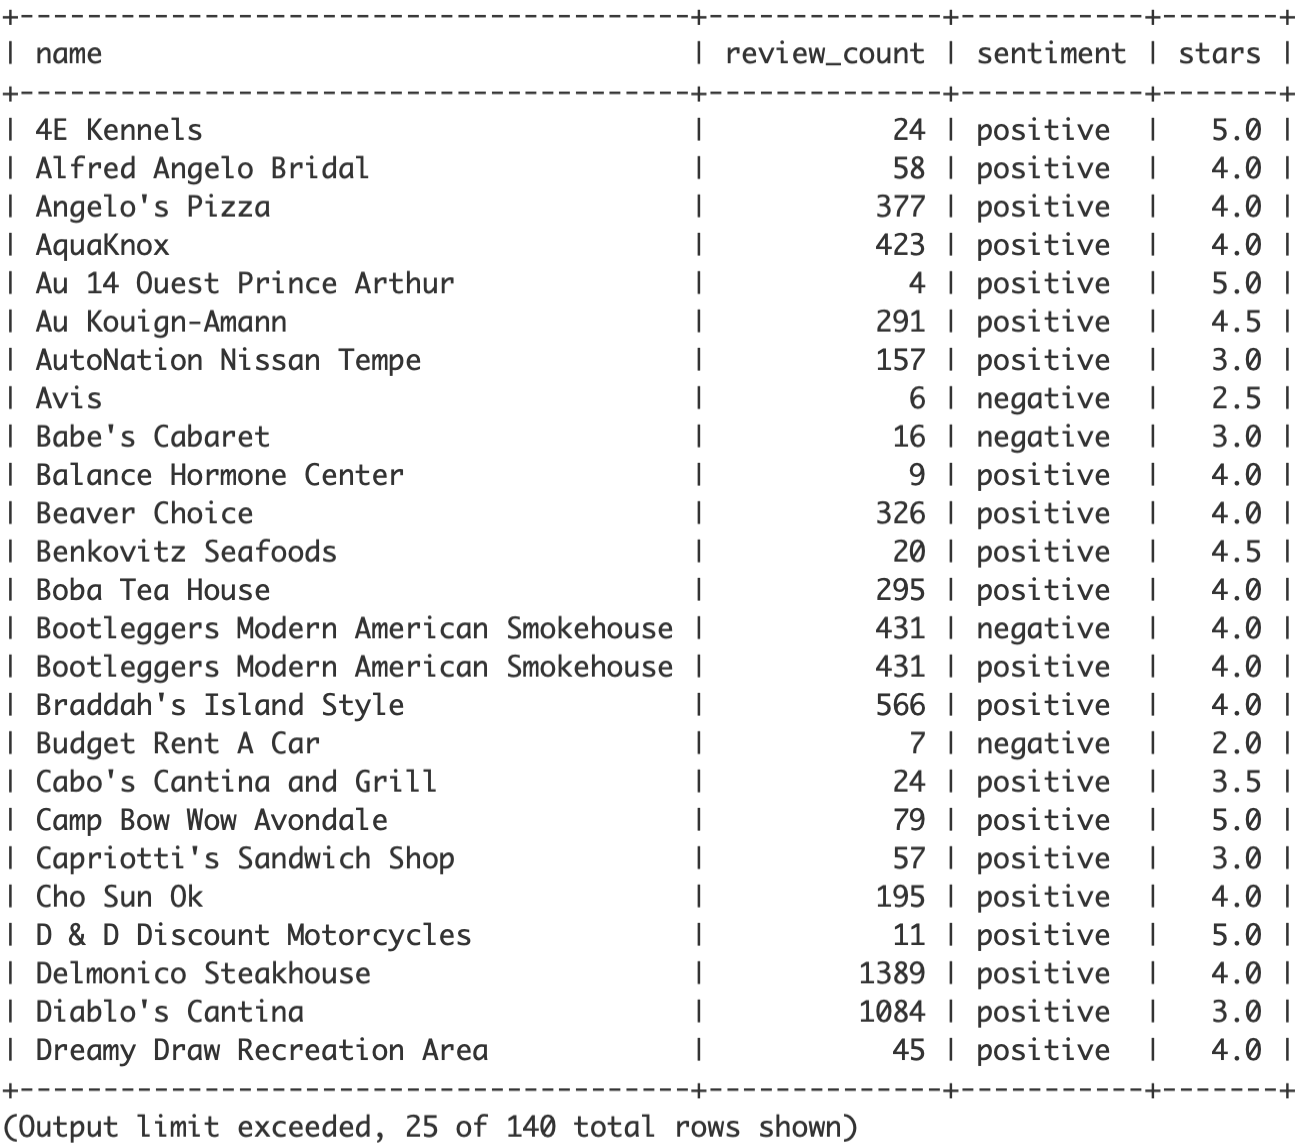